In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [27]:
Sig_Eqs=pd.read_csv("earthquakes-2023-10-27_16-35-15_+0800.tsv",delimiter="\t")
Sig_Eqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Id                                  6395 non-null   float64
 2   Year                                6395 non-null   float64
 3   Mo                                  5986 non-null   float64
 4   Dy                                  5830 non-null   float64
 5   Hr                                  4346 non-null   float64
 6   Mn                                  4137 non-null   float64
 7   Sec                                 4368 non-null   float64
 8   Tsu                                 1976 non-null   float64
 9   Vol                                 77 non-null     float64
 10  Country                             6394 non-null   object 
 11  Area                                331 non

In [3]:
#Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.
Death=Sig_Eqs[['Country','Deaths']]
Death.groupby(['Country']).sum().sort_values('Deaths', ascending=False).head(10)

,Deaths
Country,
CHINA,2075045.0
TURKEY,1188881.0
IRAN,1011449.0
ITALY,498478.0
SYRIA,439224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,279085.0
ARMENIA,191890.0


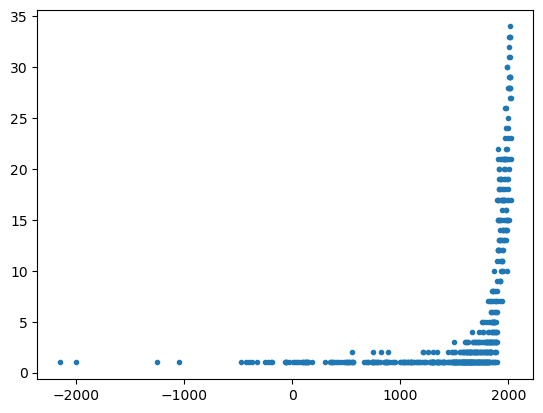

In [69]:
#Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?
Mag=Sig_Eqs[['Year','Mag']]
Mag6=Mag[Mag['Mag']>=6.0]
M=Mag6.groupby('Year').count()
m=M.values
Count=m.reshape(1,len(M.index))
M.index
Count
plt.scatter(x=M.index,y=Count,marker='.')

In [74]:
#Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.
def CountEq_LargestEq(x):

    Sig_Eqs=pd.read_csv("earthquakes-2023-10-27_16-35-15_+0800.tsv",delimiter="\t")

    Sig=Sig_Eqs[Sig_Eqs['Country']==x]

    Sig=Sig[['Mag','Year','Mo','Dy']]

    NUM=str(len(Sig))

    TEMP=Sig.sort_values('Mag', ascending=False)

    Year=TEMP.iloc[0]
    if  np.isnan(Year['Mo']) and np.isnan(Year['Dy']):
        DAT=str(int(Year['Year']))
    elif np.isnan(Year['Dy']):
        DAT=str(int(Year['Year']))+'-'+str(int(Year['Mo']))
    else:
            Y=str(int(Year['Year']))
            M=str(int(Year['Mo']))
            D=str(int(Year['Dy']))
            DAT=Y+'-'+M+'-'+D
    ALL=[NUM,DAT]
    
    
    return ALL



In [105]:
Sig_Eqs_C=Sig_Eqs['Country']

CTs=Sig_Eqs_C.unique()
CTs
L=len(CTs)
Table=pd.Series(index=CTs[1:])
Table['Name']=Table.index

      

TypeError: Series.__init__() got multiple values for argument 'index'